<a href="https://colab.research.google.com/github/piyushp648/Data_Science/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##importing libraries

In [0]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##fetching $.csv$ from url

In [0]:
url = "https://raw.githubusercontent.com/piyushp648/Data_Science/master/output/exp.csv"
df = pd.read_csv(url)
dsa_url = "https://raw.githubusercontent.com/piyushp648/Data_Science/master/dictionaries/dsa.csv"
df_dsa = pd.read_csv(dsa_url)
dbms_url = "https://raw.githubusercontent.com/piyushp648/Data_Science/master/dictionaries/dbms.csv"
df_dbms = pd.read_csv(dbms_url)
os_url = "https://raw.githubusercontent.com/piyushp648/Data_Science/master/dictionaries/os.csv"
df_os = pd.read_csv(os_url)
networks_url = "https://raw.githubusercontent.com/piyushp648/Data_Science/master/dictionaries/networks.csv"
df_networks = pd.read_csv(networks_url)
languages_url = "https://raw.githubusercontent.com/piyushp648/Data_Science/master/dictionaries/languages.csv"
df_languages = pd.read_csv(languages_url)

##grouping companies' experiences

In [0]:
df1 = df.groupby(['Company'])['Experience'].apply(list)


##$groupby$ returns a Series object, converting it to DataFrame

In [0]:
df1 = df1.to_frame()

In [0]:
df1['Experience'][0]

['In total, I gave 4 rounds of Interview for 1MG. Round 1: Telephonic Round Intermediate level interview round where I was asked about Naive Bayes, Bayes theorem, my projects, and Convolution Neural Network working in brief. Round 2: Technical round 1 onsite It was for more than 1 hour where I was asked about DCGANs, loss functions, Logistic regression in-depth\xa0knowledge, working of Naive-Bayes Classifier, Bayes theorem, and Total Probability theorem. Loss functions Mean square error, Log-Loss, Mean square log error were asked. Few more topics/algorithms were asked to know my knowledge in the field. Question: For a breast cancer dataset, \xa0 I applied three algorithms. One decision tree where I get 97% accuracy on the test set, Two random forest: 98% accuracy, Three Naive Bayes: 92% accuracy. Which algorithm is best among these? Answer: None of these, Accuracy those not tell which algorithm is best. Precision and Recall is also important. The algorithm may be correctly predicting t

another approach is to aggregate all experiences of a single company into a single string which would be useful for $idf$

In [0]:
df_1 = df.groupby('Company')['Experience'].agg(lambda col: ' '.join(col))

In [0]:
df_1=df_1.to_frame()

In [0]:
df_1['Experience'][0]

'In total, I gave 4 rounds of Interview for 1MG. Round 1: Telephonic Round Intermediate level interview round where I was asked about Naive Bayes, Bayes theorem, my projects, and Convolution Neural Network working in brief. Round 2: Technical round 1 onsite It was for more than 1 hour where I was asked about DCGANs, loss functions, Logistic regression in-depth\xa0knowledge, working of Naive-Bayes Classifier, Bayes theorem, and Total Probability theorem. Loss functions Mean square error, Log-Loss, Mean square log error were asked. Few more topics/algorithms were asked to know my knowledge in the field. Question: For a breast cancer dataset, \xa0 I applied three algorithms. One decision tree where I get 97% accuracy on the test set, Two random forest: 98% accuracy, Three Naive Bayes: 92% accuracy. Which algorithm is best among these? Answer: None of these, Accuracy those not tell which algorithm is best. Precision and Recall is also important. The algorithm may be correctly predicting th

##resetting index

In [0]:
df2 = df1.reset_index()

In [0]:
df_2 = df_1.reset_index()

##extracting 'terms' column

In [0]:
keywords_dsa = df_dsa['terms']

In [0]:
df_2

,Company,Experience
0,1mg,"In total, I gave 4 rounds of Interview for 1MG..."
1,24*7 Innovation Labs,Round 1:(Hackerrank Test) Q1: Binary tree mirr...
2,3dPLM,Round 1:Aptitude test Contains a list of 40 Ma...
3,ADP,Round 1: Code Test I was given a couple of pro...
4,APT Portfolio,Round 1 Coding Assignment – TCP sender recei...
5,AVEVA,AVEVA came to our campus to hire graduates for...
6,AXIO-NET,"Hello guys, I am sharing the recruitment proce..."
7,Accenture,The recruitment of the Accenture process start...
8,Accolite,"Round 1: The first Round was a technical, firs..."
9,Adobe,Round 1: Technical(F2F – about 45 minutes) Rou...


##extracting data from required columns


In [0]:
keywords_dbms = df_dbms['database']

In [0]:
keywords_os = df_os['operating system']

In [0]:
keywords_networks = df_networks['terms']

In [0]:
keywords_languages = df_languages['language']

##while extracting 'terms' column from main Dataframe, series object is generated


##converting that series object to dataframe

In [0]:
keywords_dsa_ = keywords_dsa.to_frame()
keywords_dbms_ = keywords_dbms.to_frame()
keywords_os_ = keywords_os.to_frame()
keywords_networks_ = keywords_networks.to_frame()
keywords_languages_ = keywords_languages.to_frame()

##extracting important subject-wise keywords and storing it in a list

In [0]:
keywords_dsa_=keywords_dsa_['terms'].tolist()

In [0]:
keywords_dbms_=keywords_dbms_['database'].tolist()

In [0]:
keywords_os_=keywords_os_['operating system'].tolist()

In [0]:
keywords_networks_=keywords_networks_['terms'].tolist()

In [0]:
keywords_languages_=keywords_languages_['language'].tolist()

##applying $Term-Frequency$ on all experiences

In [0]:
# all_exp = []
#  for index,row in df_2.iterrows():
#   all_exp.append(row['Experience'])

In [0]:
# def termFrequency(term, doc):
#   doc=doc.lower()
#   term=term.lower()
#   term_in_document=doc.count(term)
#   normalizeTermFreq = doc.split()
#   len_of_document = float(len(normalizeTermFreq ))  
#   normalized_tf = term_in_document / len_of_document
#   return normalized_tf
  

In [0]:

# def tf(term,dataframe,dict_terms):
#   for company_idx in range(len(dataframe.index)):
#     for exp in dataframe['Experience'][company_idx]:
#       if term not in dict_terms:
#         dict_terms[term] = 0  
#       dict_terms[term]+=termFrequency(term,exp)  


In [0]:
# dictionary={}
# for terms in keywords_dsa_:
#   tf(terms,df2,dict_terms=dictionary)
# print(dictionary)

{'abstract data type': 0.0019880715705765406, 'array': 49.993694273341, 'arrays': 5.228956346186192, 'linked list': 13.762281673605967, 'memory representation': 0.0033447053314602983, 'stacks': 0.8912852927865479, 'stack': 9.308819956427756, 'infix': 0.1900127536193502, 'postfix': 0.21373161437158492, 'queue': 3.9309800766729364, 'queues': 0.5889838102707043, 'enqueue': 0.47138327473974123, 'dequeue': 0.5304708687204248, 'dqueue': 0.0, 'tree': 31.27475381159857, 'avl tree': 0.35666798231038754, 'binary tree': 9.558876767686613, 'binary search tree': 1.9622898909852333, 'trie': 1.9150426713656004, 'heap': 2.2475846451956, 'forest': 0.08546201555517903, 'graph': 4.729702089301549, 'graphs': 0.5079742947218543, 'depth first search': 0.014113695483438257, 'breadth first search': 0.02001122701265635, 'minimum spanning tree': 0.0685572657136727, 'kruskal': 0.04861490217143956, 'prim': 1.8832245988040177, 'dijkstra': 0.11931707296173027, 'sorting': 2.181446769190062, 'bubble sort': 0.14925982

In [0]:
# dictionary={}
# for terms in keywords_dbms_:
#   tf(terms,df2,dict_terms=dictionary)
# print(dictionary)

{'database system': 0.01059497051475326, 'er model': 0.01431609988646787, 'entity relationship': 0.01532567049808429, 'information system': 0.00804769001490313, 'data': 13.666276353840843, 'DBMS': 3.5992765014183963, 'database management': 0.14375830792305616, 'schema': 0.2541146381675921, 'attributes': 0.09537228665905409, 'cardinality': 0.006716637564870665, 'relational data': 0.01744224508599823, 'tuples': 0.04115230262892002, 'relations': 0.22634417446671448, 'keys': 1.4051922619018409, 'primary key': 0.15772918089789612, 'candidate key': 0.025956713957044436, 'foreign key': 0.13091206128620192, 'super key': 0.019371905613513513, 'relational algebra': 0.0, 'select': 9.972697860164855, 'project': 13.15668396768357, 'join': 2.2224288749141072, 'relational calculus': 0.0, 'tuple calculus': 0.0, 'query language': 0.0, 'SQL': 2.5077916169811365, 'queries': 1.4605046279549492, 'nested queries': 0.012312817604560244, 'PL/SQL': 0.05334340583977021, 'normalization': 0.3776475010072812, 'rel

In [0]:
# dictionary={}
# for terms in keywords_os_:
#   tf(terms,df2,dict_terms=dictionary)
# print(dictionary)

{'function of operating system': 0.0, 'Evolution of operating system': 0.0, 'types of operating system': 0.003669724770642202, 'desirable characteristics of os': 0.0, 'features of os': 0.0, 'operating systems service': 0.0, 'utility program': 0.0, 'system call': 0.07271298046536079, 'fork': 0.05954564084605759, 'exec': 0.6725793646310287, 'file systems': 0.013355145576174569, 'file concept': 0.0014738393515106854, 'user’s and system programmer’s view of file system': 0.0, 'disk organization': 0.0, 'tape organization': 0.0, 'different modules of a file system': 0.0, 'disk space allocation': 0.0, 'contiguous space allocation': 0.0, 'linked space allocation': 0.0, 'indexed space allocation': 0.0, 'directory structures ': 0.0, 'file protection': 0.0, 'system calls file management': 0.0, 'disk scheduling': 0.005178166673601653, 'CPU scheduling': 0.051227328687342484, 'process': 7.745599431250792, 'scheduling': 0.49171101799280603, 'scheduler': 0.06042737376394858, 'process state diagram': 0

In [0]:
# dictionary={}
# for terms in keywords_networks_:
#   tf(terms,df2,dict_terms=dictionary)
# print(dictionary)

{'computer networks': 0.4134128612860429, 'osi': 8.706029604645293, 'peer to peer': 0.0024636314270199207, 'p2p': 0.0, 'networks': 1.0707655916880776, 'physical layer': 0.0, 'shennons': 0.0, 'nyquist': 0.0, 'guided media': 0.0, 'unguided media': 0.0, 'circuit switching': 0.008755287783617484, 'media switching': 0.0, 'data link layer': 0.01403002902188326, 'hamming code': 0.0, 'sliding window': 0.10728265795653842, 'aloha': 0.004073319755600814, 'csma': 0.000946073793755913, 'router': 0.13595704131686953, 'routing': 0.11672628174353739, 'distance vector routing': 0.0, 'classful ip addressing': 0.0, 'ip address': 0.146938221344697, 'ip addressing': 0.0023148148148148147, 'subnet': 0.0704704973718023, 'supernet': 0.005846183687324217}


In [0]:
# dictionary={}
# for terms in keywords_languages_:
#   tf(terms,df2,dict_terms=dictionary)
# print(dictionary)


{'python': 0.8534486915436045, 'c': 950.4982996128227, 'c++': 10.199365614752985, 'java': 7.085816678374681, 'javascript': 0.30816448147490216}


#applying $term-frequency$ in companies 

In [0]:
def tf(term,dataframe,dict_terms,exp):
  if term not in dict_terms:
    dict_terms[term] = 0
    dict_terms[term]+=termFrequency(term,exp)

In [0]:
def tf_(dict_,company_id,dataframe,words):
  dict_terms={}
  if company_id not in dict_:
    dict_[company_id]={}
    for term in words:
      tf(term,dataframe,dict_terms,all_exp[company_id])
      dict_[company_id]=dict_terms

In [0]:
dict_dsa={}
dataframe=df_2
words=keywords_dsa_
for company_id in range(len(dataframe.index)):
  tf_(dict_dsa,company_id,dataframe,words)

print(dict_dsa)


{0: {'abstract data type': 0.0, 'array': 0.0023148148148148147, 'arrays': 0.0, 'linked list': 0.0, 'memory representation': 0.0, 'stacks': 0.0, 'stack': 0.0023148148148148147, 'infix': 0.0, 'postfix': 0.0, 'queue': 0.0, 'queues': 0.0, 'enqueue': 0.0, 'dequeue': 0.0, 'dqueue': 0.0, 'tree': 0.006944444444444444, 'avl tree': 0.0, 'binary tree': 0.0023148148148148147, 'binary search tree': 0.0, 'trie': 0.0, 'heap': 0.0, 'forest': 0.0023148148148148147, 'graph': 0.0, 'graphs': 0.0, 'depth first search': 0.0, 'breadth first search': 0.0, 'minimum spanning tree': 0.0, 'kruskal': 0.0, 'prim': 0.0, 'dijkstra': 0.0, 'sorting': 0.0, 'bubble sort': 0.0, 'quick sort': 0.0, 'merge sort': 0.0, 'radix sort': 0.0, 'shell sort': 0.0, 'insertion sort': 0.0, 'binary search': 0.0, 'sequential search': 0.0, 'hash': 0.0, 'hashing': 0.0, 'indexing': 0.0, 'code tuning': 0.0, 'code tuning techniques': 0.0, 'loop optimization': 0.0, 'complexity': 0.0, 'time complexity': 0.0, 'space complexity': 0.0, 'time space 

In [0]:
dict_languages={}
dataframe=df_2
words=keywords_languages_
for company_id in range(len(dataframe.index)):
  tf_(dict_languages,company_id,dataframe,words)

print(dict_languages)


{0: {'python': 0.0, 'c': 0.16203703703703703, 'c++': 0.0, 'java': 0.0, 'javascript': 0.0}, 1: {'python': 0.0004366812227074236, 'c': 0.14017467248908297, 'c++': 0.002183406113537118, 'java': 0.0017467248908296944, 'javascript': 0.0}, 2: {'python': 0.0, 'c': 0.17704280155642024, 'c++': 0.011673151750972763, 'java': 0.0019455252918287938, 'javascript': 0.0}, 3: {'python': 0.0, 'c': 0.14914772727272727, 'c++': 0.0014204545454545455, 'java': 0.0014204545454545455, 'javascript': 0.0}, 4: {'python': 0.0, 'c': 0.2398190045248869, 'c++': 0.004524886877828055, 'java': 0.0, 'javascript': 0.0}, 5: {'python': 0.0, 'c': 0.1267605633802817, 'c++': 0.0, 'java': 0.0035211267605633804, 'javascript': 0.0}, 6: {'python': 0.0, 'c': 0.16939890710382513, 'c++': 0.0, 'java': 0.0, 'javascript': 0.0}, 7: {'python': 0.0007537688442211055, 'c': 0.15979899497487438, 'c++': 0.001507537688442211, 'java': 0.001507537688442211, 'javascript': 0.0}, 8: {'python': 3.6362314097669174e-05, 'c': 0.12403185338714956, 'c++':

In [0]:
dict_networks={}
dataframe=df_2
words=keywords_networks_
for company_id in range(len(dataframe.index)):
  tf_(dict_networks,company_id,dataframe,words)

print(dict_networks)


{0: {'computer networks': 0.0, 'osi': 0.0, 'peer to peer': 0.0, 'p2p': 0.0, 'networks': 0.0, 'physical layer': 0.0, 'shennons': 0.0, 'nyquist': 0.0, 'guided media': 0.0, 'unguided media': 0.0, 'circuit switching': 0.0, 'media switching': 0.0, 'data link layer': 0.0, 'hamming code': 0.0, 'sliding window': 0.0, 'aloha': 0.0, 'csma': 0.0, 'router': 0.0, 'routing': 0.0, 'distance vector routing': 0.0, 'classful ip addressing': 0.0, 'ip address': 0.0, 'ip addressing': 0.0, 'subnet': 0.0, 'supernet': 0.0}, 1: {'computer networks': 0.0, 'osi': 0.0004366812227074236, 'peer to peer': 0.0, 'p2p': 0.0, 'networks': 0.0, 'physical layer': 0.0, 'shennons': 0.0, 'nyquist': 0.0, 'guided media': 0.0, 'unguided media': 0.0, 'circuit switching': 0.0, 'media switching': 0.0, 'data link layer': 0.0, 'hamming code': 0.0, 'sliding window': 0.0, 'aloha': 0.0, 'csma': 0.0, 'router': 0.0, 'routing': 0.0, 'distance vector routing': 0.0, 'classful ip addressing': 0.0, 'ip address': 0.0, 'ip addressing': 0.0, 'sub

In [0]:
dict_dbms={}
dataframe=df_2
words=keywords_dbms_
for company_id in range(len(dataframe.index)):
  tf_(dict_dbms,company_id,dataframe,words)

print(dict_dbms)


{0: {'database system': 0.0, 'er model': 0.0, 'entity relationship': 0.0, 'information system': 0.0, 'data': 0.0023148148148148147, 'DBMS': 0.0, 'database management': 0.0, 'schema': 0.0, 'attributes': 0.0, 'cardinality': 0.0, 'relational data': 0.0, 'tuples': 0.0, 'relations': 0.0, 'keys': 0.0, 'primary key': 0.0, 'candidate key': 0.0, 'foreign key': 0.0, 'super key': 0.0, 'relational algebra': 0.0, 'select': 0.0023148148148148147, 'project': 0.0023148148148148147, 'join': 0.0, 'relational calculus': 0.0, 'tuple calculus': 0.0, 'query language': 0.0, 'SQL': 0.0, 'queries': 0.0, 'nested queries': 0.0, 'PL/SQL': 0.0, 'normalization': 0.0, 'relation schemas': 0.0, 'functional dependencies': 0.0, 'normal form': 0.0, '1NF': 0.0, '2NF': 0.0, '3NF': 0.0, 'BCNF': 0.0, 'loss less join': 0.0, 'query processing': 0.0, 'optimization of relational algebra': 0.0, 'transaction': 0.0, 'concurrency': 0.0, 'transaction properties ': 0.0, 'transaction states': 0.0, 'schedules': 0.0, 'serializability': 0

In [0]:
dict_os={}
dataframe=df_2
words=keywords_os_
for company_id in range(len(dataframe.index)):
  tf_(dict_os,company_id,dataframe,words)

print(dict_os)


{0: {'function of operating system': 0.0, 'Evolution of operating system': 0.0, 'types of operating system': 0.0, 'desirable characteristics of os': 0.0, 'features of os': 0.0, 'operating systems service': 0.0, 'utility program': 0.0, 'system call': 0.0, 'fork': 0.0, 'exec': 0.0, 'file systems': 0.0, 'file concept': 0.0, 'user’s and system programmer’s view of file system': 0.0, 'disk organization': 0.0, 'tape organization': 0.0, 'different modules of a file system': 0.0, 'disk space allocation': 0.0, 'contiguous space allocation': 0.0, 'linked space allocation': 0.0, 'indexed space allocation': 0.0, 'directory structures ': 0.0, 'file protection': 0.0, 'system calls file management': 0.0, 'disk scheduling': 0.0, 'CPU scheduling': 0.0, 'process': 0.0, 'scheduling': 0.0, 'scheduler': 0.0, 'process state diagram': 0.0, 'scheduling algorithms': 0.0, 'system calls process management ': 0.0, 'multiple processor scheduling': 0.0, 'threads': 0.0, 'input process': 0.0, 'output process': 0.0, '

#sample dataframe of term frequency result

In [0]:
def tf_view(dictionary):
  data=pd.DataFrame.from_dict(dictionary)
  data=data.T
  data = data.reindex(sorted(data.columns), axis=1)
  return data.head()

In [0]:
tf_view(dict_os)

In [0]:
tf_view(dict_networks)

,aloha,circuit switching,classful ip addressing,computer networks,csma,data link layer,distance vector routing,guided media,hamming code,ip address,ip addressing,media switching,networks,nyquist,osi,p2p,peer to peer,physical layer,router,routing,shennons,sliding window,subnet,supernet,unguided media
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##applying $inverse-document-frequency$ by treating one company as one document

In [0]:
def inverseDocumentFrequency(term): 
  num_exp_with_given_term = 0
  term=term.lower()
  for exp in all_exp:
    exp=exp.lower()
    if exp.count(term)>0:
      num_exp_with_given_term+=1

  if num_exp_with_given_term>0:
    total_num_exp=len(all_exp)

    idf_val=np.log(float(total_num_exp)/ num_exp_with_given_term)
    return idf_val
  else:
    return 0

In [0]:
def idf(term,dictionary):
  if term not in dictionary:
    dictionary[term]=0
  dictionary[term]+=inverseDocumentFrequency(term)

In [0]:
dictionary_dsa_idf={}
for term in keywords_dsa_:
  idf(term,dictionary_dsa_idf)
print(dictionary_dsa_idf)

{'abstract data type': 5.991464547107982, 'array': 0.490206336563255, 'arrays': 1.1472774606493907, 'linked list': 0.7133498878774648, 'memory representation': 5.298317366548036, 'stacks': 1.8018098050815565, 'stack': 0.8266785731844679, 'infix': 3.0470255679415414, 'postfix': 3.0470255679415414, 'queue': 1.2909841813155658, 'queues': 2.120263536200091, 'enqueue': 2.695627681103653, 'dequeue': 2.659260036932778, 'dqueue': 0, 'tree': 0.6396064136319155, 'avl tree': 2.184802057337662, 'binary tree': 1.0147308046874077, 'binary search tree': 1.6873994539038122, 'trie': 1.1162672239068305, 'heap': 1.3963446969733921, 'forest': 3.158251203051766, 'graph': 1.0642108619507773, 'graphs': 1.8805906829346708, 'depth first search': 4.382026634673881, 'breadth first search': 3.7942399697717626, 'minimum spanning tree': 3.158251203051766, 'kruskal': 3.506557897319982, 'prim': 1.2039728043259361, 'dijkstra': 2.659260036932778, 'sorting': 1.1472774606493907, 'bubble sort': 2.695627681103653, 'quick s

In [0]:
dictionary_dbms_idf={}
for term in keywords_dbms_:
  idf(term,dictionary_dbms_idf)
print(dictionary_dbms_idf)

{'database system': 4.382026634673881, 'er model': 4.199705077879927, 'entity relationship': 11.982929094215963, 'information system': 4.892852258439873, 'data': 0.3011050927839216, 'DBMS': 0.8209805520698303, 'database management': 2.624168717121508, 'schema': 2.3805466344637574, 'attributes': 2.855970331178832, 'cardinality': 4.605170185988092, 'relational data': 3.912023005428146, 'tuples': 3.506557897319982, 'relations': 2.2302644314144198, 'keys': 1.8643301620628903, 'primary key': 2.5257286443082556, 'candidate key': 3.5935692743096115, 'foreign key': 2.5257286443082556, 'super key': 4.045554398052669, 'relational algebra': 0, 'select': 0.43850496218636464, 'project': 0.25812327021023646, 'join': 0.8040787412672269, 'relational calculus': 0, 'tuple calculus': 0, 'query language': 0, 'SQL': 0.8675005677047231, 'queries': 1.0936247471570706, 'nested queries': 4.045554398052669, 'PL/SQL': 4.045554398052669, 'normalization': 1.8971199848858813, 'relation schemas': 0, 'functional depe

In [0]:
dictionary_networks_idf={}
for term in keywords_networks_:
  idf(term,dictionary_networks_idf)
print(dictionary_networks_idf)

{'computer networks': 1.8805906829346708, 'osi': 0.6831968497067772, 'peer to peer': 5.298317366548036, 'p2p': 0, 'networks': 1.4375876555074412, 'physical layer': 0, 'shennons': 0, 'nyquist': 0, 'guided media': 0, 'unguided media': 0, 'circuit switching': 4.892852258439873, 'media switching': 0, 'data link layer': 4.382026634673881, 'hamming code': 0, 'sliding window': 3.4265151896464454, 'aloha': 5.991464547107982, 'csma': 5.991464547107982, 'router': 2.900422093749666, 'routing': 2.946942109384559, 'distance vector routing': 0, 'classful ip addressing': 0, 'ip address': 2.7333680090865, 'ip addressing': 5.991464547107982, 'subnet': 3.5935692743096115, 'supernet': 4.892852258439873}


In [0]:
dictionary_languages_idf={}
for term in keywords_languages_:
  idf(term,dictionary_languages_idf)
print(dictionary_languages_idf)

{'python': 1.5488132906176655, 'c': 0.0, 'c++': 0.5842927756478633, 'java': 0.5150009951764712, 'javascript': 2.120263536200091}


In [0]:
dictionary_os_idf={}
for term in keywords_os_:
  idf(term,dictionary_os_idf)
print(dictionary_os_idf)

{'function of operating system': 0, 'Evolution of operating system': 0, 'types of operating system': 5.298317366548036, 'desirable characteristics of os': 0, 'features of os': 0, 'operating systems service': 0, 'utility program': 0, 'system call': 2.900422093749666, 'fork': 3.0470255679415414, 'exec': 1.6220166946409607, 'file systems': 4.199705077879927, 'file concept': 5.298317366548036, 'user’s and system programmer’s view of file system': 0, 'disk organization': 0, 'tape organization': 0, 'different modules of a file system': 0, 'disk space allocation': 0, 'contiguous space allocation': 0, 'linked space allocation': 0, 'indexed space allocation': 0, 'directory structures ': 0, 'file protection': 0, 'system calls file management': 0, 'disk scheduling': 4.892852258439873, 'CPU scheduling': 3.283414346005772, 'process': 0.4740116506432744, 'scheduling': 1.8805906829346708, 'scheduler': 3.506557897319982, 'process state diagram': 4.605170185988092, 'scheduling algorithms': 2.8134107167

#sample dataframe of inverse document frequency 

In [0]:
data_os=pd.DataFrame(dictionary_os_idf,index=['all_companies'])
#data=data.T
data_os = data_os.reindex(sorted(data_os.columns), axis=1)
data_os

,CPU scheduling,Evolution of operating system,asynchronous operation,concurrent i/o,concurrent processes,contiguous space allocation,critical section,deadlock,deadlock avoidance,deadlock prevention,deadlock problem,deadlock recovery,desirable characteristics of os,different modules of a file system,directory structures,disk organization,disk scheduling,disk space allocation,exec,features of os,file concept,file protection,file systems,fork,function of operating system,i/o interface,indexed space allocation,input process,inter process communication,interrupt driven i/o,ipc,linked space allocation,linux,multiple processor scheduling,mutual exclusion,operating systems service,output process,process,process state diagram,program controlled i/o,real concurrency,scheduler,scheduling,scheduling algorithms,semaphore,signal,speed gap format conversion,synchronization,system call,system calls file management,system calls process management,tape organization,threads,types of operating system,unix,user’s and system programmer’s view of file system,utility program,virtual concurrency,wait,windows
all_companies,3.283414,0,0,0,5.991465,0,2.813411,1.757358,5.298317,5.991465,5.991465,0,0,0,0,0,4.892852,0,1.622017,0,5.298317,0,4.199705,3.047026,0,0,0,0,4.199705,0,3.506558,0,1.966113,0,3.79424,0,5.991465,0.474012,4.60517,0,0,3.506558,1.880591,2.813411,1.673976,2.900422,0,2.380547,2.900422,0,0,0,1.525556,5.298317,2.327903,0,0,0,1.347074,2.590267


#$tf-idf$ calculations

In [0]:
data_os.iloc[0].head(10) #idf data frame

CPU scheduling                   3.283414
Evolution of operating system    0.000000
asynchronous operation           0.000000
concurrent i/o                   0.000000
concurrent processes             5.991465
contiguous space allocation      0.000000
critical section                 2.813411
deadlock                         1.757358
deadlock avoidance               5.298317
deadlock prevention              5.991465
Name: all_companies, dtype: float64

In [0]:
data.iloc[9].head(10) #tf data frame for 9th company index

CPU scheduling                   0.000075
Evolution of operating system    0.000000
asynchronous operation           0.000000
concurrent i/o                   0.000000
concurrent processes             0.000000
contiguous space allocation      0.000000
critical section                 0.000112
deadlock                         0.000187
deadlock avoidance               0.000000
deadlock prevention              0.000000
Name: 9, dtype: float64

#$tf * idf$ sample

In [0]:
new_frame_os=data.iloc[9]*data_os.iloc[0]

In [0]:
os=pd.DataFrame(new_frame_os)

##dropping 0 values 

In [0]:
os = os.replace(0, np.nan)
os = os.dropna(how='all', axis=0)

In [0]:
os.rename({0:'tf*idf'},axis=1)

,tf*idf
CPU scheduling,0.000245
critical section,0.000315
deadlock,0.000328
exec,0.000364
inter process communication,0.000157
ipc,0.000131
process,0.000691
scheduling,0.000422
semaphore,0.000438
signal,0.000217


Text(0, 0.5, 'Important OS topics')

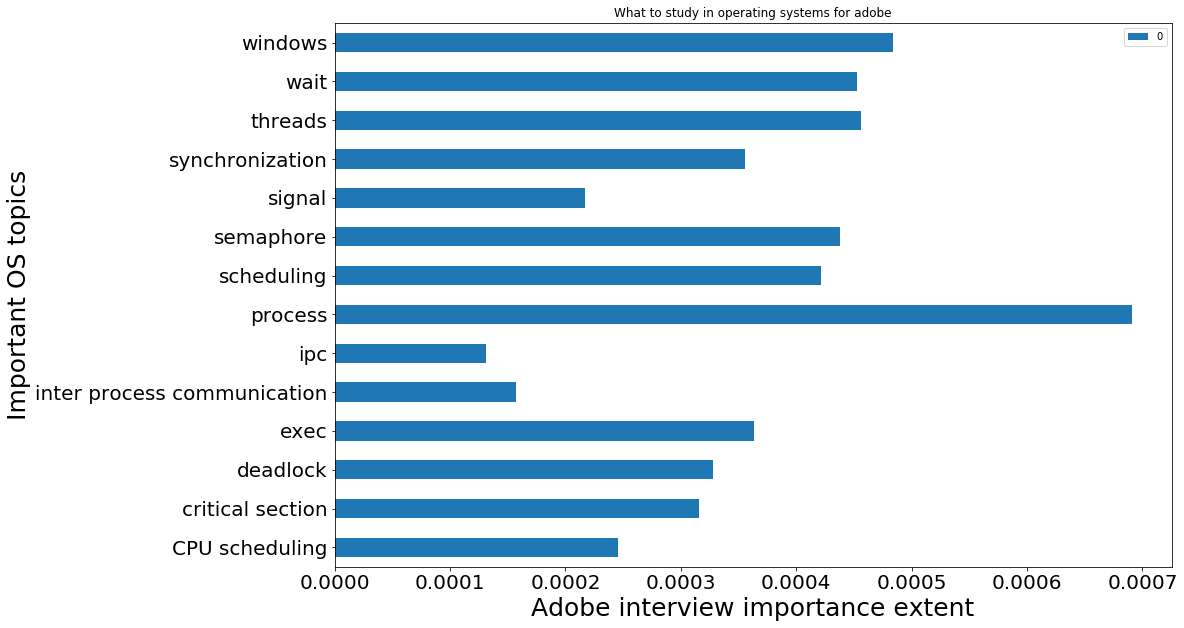

In [0]:
ax=os.plot(kind='barh',figsize=(15,10),fontsize=20,legend=True,title='What to study in operating systems for adobe')
ax.set_xlabel("Adobe interview importance extent", fontsize=25)
ax.set_ylabel("Important OS topics", fontsize=25)